# Import Packages

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# Import Data

In [2]:
mobility = pd.read_csv("Global_Mobility_Report.csv")
gdp = pd.read_csv("gdp_weights.csv")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
state_names= pd.read_csv("state_name.csv")

# Clean the data

In [4]:
#Only rows in the United States
US_States = mobility['country_region'] == "United States"
US_State_data = mobility[US_States]

#Drop all rows with sub-region 2 data as this is county level
US_State_data = US_State_data[US_State_data['sub_region_2'].isnull()]

#drop all rows without sub-region 1 data since they are not a state
US_State_data = US_State_data[US_State_data['sub_region_1'].notna()]

# Merge Data

In [5]:
#merge US mobility data with weighting data
result_1 = pd.merge(US_State_data,
                  gdp[["GDP_Contribution","State","Region"]],
                  left_on = "sub_region_1",
                  right_on ="State",
                  how='left')

# Convert date to datetime

In [6]:
#convert date to datetime
result_1['Date'] =  pd.to_datetime(result_1['date'], format='%d/%m/%Y')
result_1 = result_1.set_index('Date')

In [7]:
#reindex the series
result_1["workplaces_percent_change_from_baseline"]= 100+ result_1["workplaces_percent_change_from_baseline"]

In [8]:
result_1.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,GDP_Contribution,State,Region
Date,,,,,,,,,,,,,,,,
2020-06-23,US,United States,Wyoming,NaN,US-WY,NaN,23/06/2020,13.0,26.0,267.0,28.0,76.0,4.0,0.002,Wyoming,Rocky Mountain
2020-06-24,US,United States,Wyoming,NaN,US-WY,NaN,24/06/2020,12.0,27.0,278.0,31.0,76.0,4.0,0.002,Wyoming,Rocky Mountain
2020-06-25,US,United States,Wyoming,NaN,US-WY,NaN,25/06/2020,11.0,27.0,233.0,35.0,75.0,5.0,0.002,Wyoming,Rocky Mountain
2020-06-26,US,United States,Wyoming,NaN,US-WY,NaN,26/06/2020,5.0,30.0,NaN,44.0,76.0,4.0,0.002,Wyoming,Rocky Mountain
2020-06-27,US,United States,Wyoming,NaN,US-WY,NaN,27/06/2020,4.0,31.0,316.0,56.0,91.0,-2.0,0.002,Wyoming,Rocky Mountain


# Create the series

In [9]:
#Create the components to be summed
result_2= result_1
result_2["weighted_mobility"]= result_1["workplaces_percent_change_from_baseline"]*result_1["GDP_Contribution"]

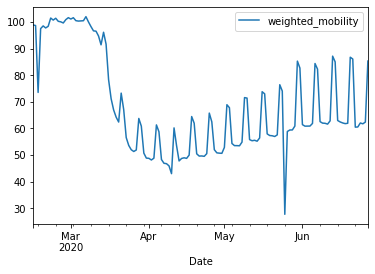

In [10]:
#sum weighted components
df1 = pd.DataFrame(result_2.groupby('Date')['weighted_mobility'].sum())
df1.plot()

# Regional Series

In [11]:
#set to only get unique values
S_east = result_1['Region'] == "Southeast"
F_west = result_1['Region'] == "Far West"
S_west = result_1['Region'] == "Southwest"
M_east = result_1['Region'] == "Mideast"
G_Lakes = result_1['Region'] == "Great Lakes"
Plains = result_1['Region'] == "Plains"
N_Eng = result_1['Region'] == "New England"
R_Mountain = result_1['Region'] == "Rocky Mountain"

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


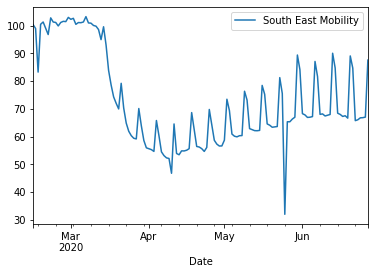

In [12]:
#dataframe for region
df_SE = result_1[S_east]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d/%m/%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d/%m/%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["workplaces_percent_change_from_baseline"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_SE2 = df_SE2.rename(columns={"regionally_weighted_mobility": "South East Mobility"})

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df1, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


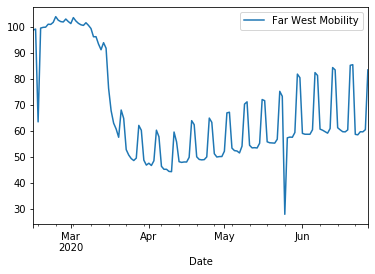

In [13]:
#dataframe for region
df_FW = result_1[F_west]

#convert the date to datetime
df_FW['Date'] =  pd.to_datetime(df_FW['date'], format='%d/%m/%Y')
df_FW = df_FW.set_index('Date')

#work out sum of gdp contribution for regions
df_FW1 = pd.DataFrame(df_FW.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_FW1['Date'] =  pd.to_datetime(df_FW1['date'], format='%d/%m/%Y')
df_FW1 = df_FW1.set_index('Date')

#merge data
df_FW1 = df_FW1.merge(df_FW, left_index=True, right_index=True)

#calculate the weight for each state
df_FW1["regional_weight"] = df_FW1['GDP_Contribution_y']/df_FW1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_FW1["regionally_weighted_mobility"]= df_FW1["workplaces_percent_change_from_baseline"]*df_FW1["regional_weight"]

#sum weighted components
df_FW2 = pd.DataFrame(df_FW1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_FW2 = df_FW2.rename(columns={"regionally_weighted_mobility": "Far West Mobility"})

#plot to check it works
df_FW2.plot()

#merge data
df_Master = df_FW2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


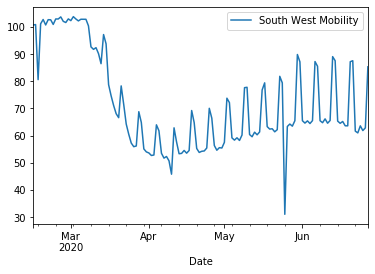

In [14]:
#dataframe for region
df_SW = result_1[S_west]

#convert the date to datetime
df_SW['Date'] =  pd.to_datetime(df_SW['date'], format='%d/%m/%Y')
df_SW = df_SW.set_index('Date')

#work out sum of gdp contribution for regions
df_SW1 = pd.DataFrame(df_SW.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SW1['Date'] =  pd.to_datetime(df_SW1['date'], format='%d/%m/%Y')
df_SW1 = df_SW1.set_index('Date')

#merge data
df_SW1 = df_SW1.merge(df_SW, left_index=True, right_index=True)

#calculate the weight for each state
df_SW1["regional_weight"] = df_SW1['GDP_Contribution_y']/df_SW1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SW1["regionally_weighted_mobility"]= df_SW1["workplaces_percent_change_from_baseline"]*df_SW1["regional_weight"]

#sum weighted components
df_SW2 = pd.DataFrame(df_SW1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_SW2 = df_SW2.rename(columns={"regionally_weighted_mobility": "South West Mobility"})

#plot to check it works
df_SW2.plot()

#merge data
df_Master = df_SW2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


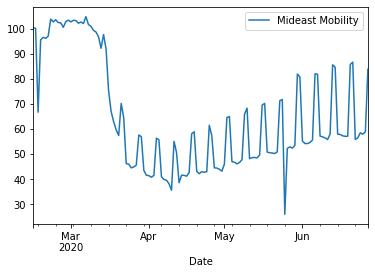

In [15]:
#dataframe for region
df_ME = result_1[M_east]

#convert the date to datetime
df_ME['Date'] =  pd.to_datetime(df_ME['date'], format='%d/%m/%Y')
df_ME = df_ME.set_index('Date')

#work out sum of gdp contribution for regions
df_ME1 = pd.DataFrame(df_ME.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_ME1['Date'] =  pd.to_datetime(df_ME1['date'], format='%d/%m/%Y')
df_ME1 = df_ME1.set_index('Date')

#merge data
df_ME1 = df_ME1.merge(df_ME, left_index=True, right_index=True)

#calculate the weight for each state
df_ME1["regional_weight"] = df_ME1['GDP_Contribution_y']/df_ME1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_ME1["regionally_weighted_mobility"]= df_ME1["workplaces_percent_change_from_baseline"]*df_ME1["regional_weight"]

#sum weighted components
df_ME2 = pd.DataFrame(df_ME1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_ME2 = df_ME2.rename(columns={"regionally_weighted_mobility": "Mideast Mobility"})

#plot to check it works
df_ME2.plot()

#merge data
df_Master = df_ME2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


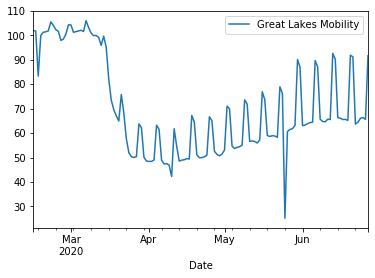

In [16]:
#dataframe for region
df_GL = result_1[G_Lakes]

#convert the date to datetime
df_GL['Date'] =  pd.to_datetime(df_GL['date'], format='%d/%m/%Y')
df_GL = df_GL.set_index('Date')

#work out sum of gdp contribution for regions
df_GL1 = pd.DataFrame(df_GL.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_GL1['Date'] =  pd.to_datetime(df_GL1['date'], format='%d/%m/%Y')
df_GL1 = df_GL1.set_index('Date')

#merge data
df_GL1 = df_GL1.merge(df_GL, left_index=True, right_index=True)

#calculate the weight for each state
df_GL1["regional_weight"] = df_GL1['GDP_Contribution_y']/df_GL1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_GL1["regionally_weighted_mobility"]= df_GL1["workplaces_percent_change_from_baseline"]*df_GL1["regional_weight"]

#sum weighted components
df_GL2 = pd.DataFrame(df_GL1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_GL2 = df_GL2.rename(columns={"regionally_weighted_mobility": "Great Lakes Mobility"})

#plot to check it works
df_GL2.plot()

#merge data
df_Master = df_GL2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


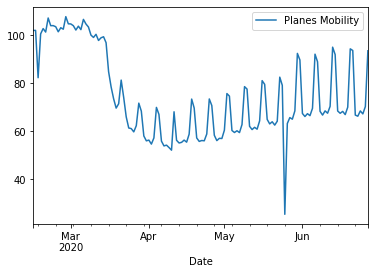

In [17]:
#dataframe for region
df_PL = result_1[Plains]

#convert the date to datetime
df_PL['Date'] =  pd.to_datetime(df_PL['date'], format='%d/%m/%Y')
df_PL = df_PL.set_index('Date')

#work out sum of gdp contribution for regions
df_PL1 = pd.DataFrame(df_PL.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_PL1['Date'] =  pd.to_datetime(df_PL1['date'], format='%d/%m/%Y')
df_PL1 = df_PL1.set_index('Date')

#merge data
df_PL1 = df_PL1.merge(df_PL, left_index=True, right_index=True)

#calculate the weight for each state
df_PL1["regional_weight"] = df_PL1['GDP_Contribution_y']/df_PL1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_PL1["regionally_weighted_mobility"]= df_PL1["workplaces_percent_change_from_baseline"]*df_PL1["regional_weight"]

#sum weighted components
df_PL2 = pd.DataFrame(df_PL1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_PL2 = df_PL2.rename(columns={"regionally_weighted_mobility": "Planes Mobility"})

#plot to check it works
df_PL2.plot()

#merge data
df_Master = df_PL2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


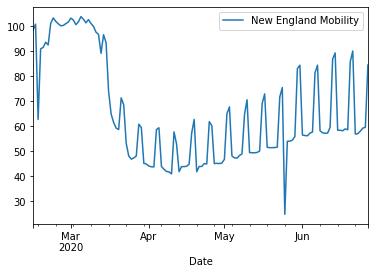

In [18]:
#dataframe for region
df_NE = result_1[N_Eng]

#convert the date to datetime
df_NE['Date'] =  pd.to_datetime(df_NE['date'], format='%d/%m/%Y')
df_NE = df_NE.set_index('Date')

#work out sum of gdp contribution for regions
df_NE1 = pd.DataFrame(df_NE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_NE1['Date'] =  pd.to_datetime(df_NE1['date'], format='%d/%m/%Y')
df_NE1 = df_NE1.set_index('Date')

#merge data
df_NE1 = df_NE1.merge(df_NE, left_index=True, right_index=True)

#calculate the weight for each state
df_NE1["regional_weight"] = df_NE1['GDP_Contribution_y']/df_NE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_NE1["regionally_weighted_mobility"]= df_NE1["workplaces_percent_change_from_baseline"]*df_NE1["regional_weight"]

#sum weighted components
df_NE2 = pd.DataFrame(df_NE1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_NE2 = df_NE2.rename(columns={"regionally_weighted_mobility": "New England Mobility"})

#plot to check it works
df_NE2.plot()

#merge data
df_Master = df_NE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


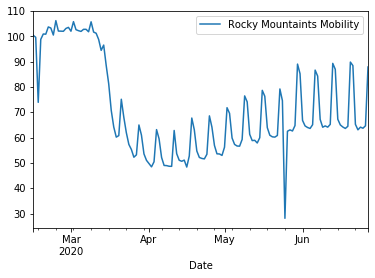

In [19]:
#dataframe for region
df_RM = result_1[R_Mountain]

#convert the date to datetime
df_RM['Date'] =  pd.to_datetime(df_RM['date'], format='%d/%m/%Y')
df_RM = df_RM.set_index('Date')

#work out sum of gdp contribution for regions
df_RM1 = pd.DataFrame(df_RM.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_RM1['Date'] =  pd.to_datetime(df_RM1['date'], format='%d/%m/%Y')
df_RM1 = df_RM1.set_index('Date')

#merge data
df_RM1 = df_RM1.merge(df_RM, left_index=True, right_index=True)

#calculate the weight for each state
df_RM1["regional_weight"] = df_RM1['GDP_Contribution_y']/df_RM1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_RM1["regionally_weighted_mobility"]= df_RM1["workplaces_percent_change_from_baseline"]*df_RM1["regional_weight"]

#sum weighted components
df_RM2 = pd.DataFrame(df_RM1.groupby('Date')['regionally_weighted_mobility'].sum())

#rename columns
df_RM2 = df_RM2.rename(columns={"regionally_weighted_mobility": "Rocky Mountaints Mobility"})

#plot to check it works
df_RM2.plot()

#merge data
df_Master = df_RM2.merge(df_Master, left_index=True, right_index=True)

In [20]:
df_Master.to_csv("mobility.csv")